# Polar Coordinates on a Disk

As another simple application, suppose we want to model a numerical grid for the unit disk using polar coordinates. Then we will sample the function 

$$
f(r, \varphi) = e^{-r} \sin(\varphi)
$$

on that disk and calculate its partial derivatives $\partial/\partial_r$ and $\partial/\partial_\varphi$ using spectral methods throughout.

First some imports:

In [48]:
from numgrids import *
from numpy import pi, sin, cos, exp
import numpy as np
import matplotlib.pyplot as plt

Then we define the grid for the unit disk. For the azimuthal axis ($\varphi$ coordinate), we can use an equidistant spacing with periodic boundary conditions. The radial axis is **not** periodic, however. So in order to use spectral methods also for the radial axis, we cannot use equidistant spacing. Instead, we choose a Chebyshev spacing:

In [49]:
grid = Grid(
    Axis.of_type(AxisType.CHEBYSHEV, 10, 0, 1),  # the radial axis
    Axis.of_type(AxisType.EQUIDISTANT_PERIODIC, 20, 0, 2*pi) # the azimuthal axis
)

The coordinates can be obtained from the `meshed_coords` property of the grid:

In [50]:
R, Phi = grid.meshed_coords

In [52]:
R.shape

(10, 20)

In [53]:
Phi.shape

(10, 20)

Now let's plot that grid with matplotlib. It's easier to do this in cartesian coordinates. So we simply transform like:

In [54]:
X = R * cos(Phi)
Y = R * sin(Phi)

And we can plot that:

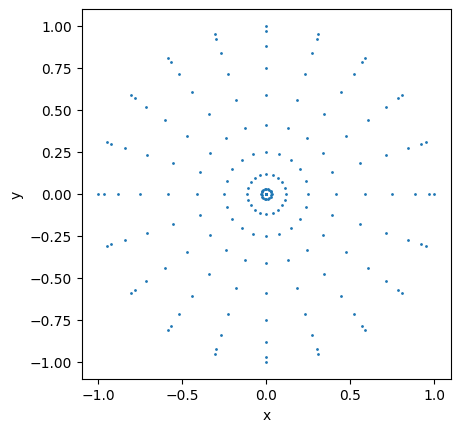

In [55]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.plot(X.reshape(-1), Y.reshape(-1), "o", ms=1)
ax.set_xlabel("x")
ax.set_ylabel("y");

Note that the spacing is rather coarse. This is by intention, because with the spectral methods, we don't need fine grids.

Now we sample the function:

In [56]:
f = exp(-R)* sin(Phi)

In [57]:
f.shape

(10, 20)

And make a contour plot of that function:

<a list of 10 text.Text objects>

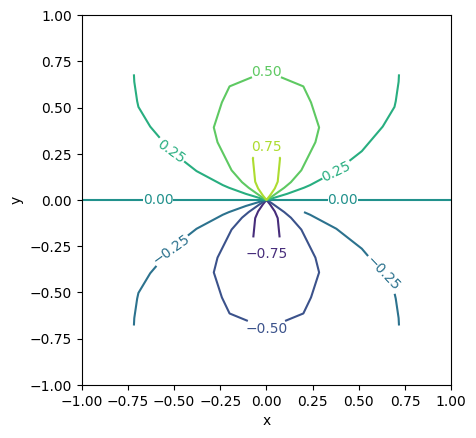

In [58]:
fig = plt.figure()
ax = fig.add_subplot() 

CS = ax.contour(X, Y, f)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect("equal")
ax.clabel(CS, inline=True, fontsize=10)

Next, we define the partial derivatives. For $\partial/\partial_r$, we have define the derivative with respect to axis index 0:

In [62]:
d_dR = Diff(grid, 1, 0)  # 1 stands for first derivative

For $\partial/\partial_\varphi$, we have

In [64]:
d_dPhi = Diff(grid, 1, 1)

as the $\varphi$ axis is the one with index 1.

To apply the partial derivatives, we simply apply the operator:

In [65]:
df_dR = d_dR(f)

We can compare with the exact derivative:

In [66]:
df_dR_exact = - f

and compute the max. error we have made with our numerical approximation:

In [67]:
error = np.max(np.abs(df_dR - df_dR_exact))
error

2.4199753312359462e-11

Note that we have achieved an amazing accuracy, in particular considering the coarse grid that we have used. What about the other partial derivative?

In [68]:
df_dPhi = d_dPhi(f)

In [69]:
df_dPhi_exact = exp(-R) * cos(Phi)

In [70]:
error = np.max(np.abs(df_dPhi - df_dPhi_exact))
error

1.942890293094024e-15

Again, amazing accuracy. That's the power of spectral methods.